In [11]:
from PIL import Image
from torchvision.models import resnet50, ResNet50_Weights
from transform_factory import get_trivial_augment, resize_224, center_crop_224, resize_322, imagenet_normalize, tensorize
from expl import ExplFactory
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.transforms import InterpolationMode


In [2]:
model = resnet50(weights = ResNet50_Weights.DEFAULT).eval().cuda()
img = Image.open("/home/juhyeon/Imagenet/val/n04127249/ILSVRC2012_val_00024718.JPEG")
expl_func = ExplFactory().get_explainer(model = model, expl_method = "GradCAM", upsample=False)


In [3]:
orig_img = center_crop_224(resize_322(img))
expl_img = resize_224(img)


In [4]:
y = model(imagenet_normalize(tensorize(orig_img)).unsqueeze(0).cuda()).argmax()

In [5]:
orig_expl, _ = expl_func(imagenet_normalize(tensorize(orig_img)).unsqueeze(0).cuda(), y)

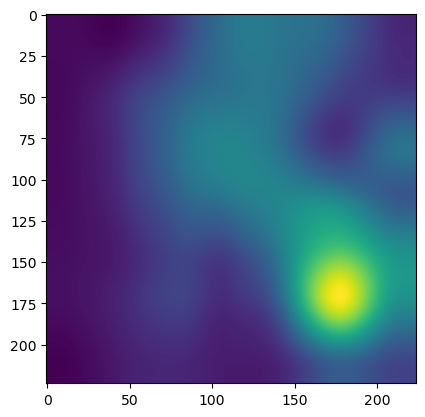

In [6]:
plt.imshow(F.interpolate(orig_expl, (224, 224), mode='bicubic').squeeze().detach().cpu())

In [7]:
T = get_trivial_augment()
trans_img = T(expl_img)

[('hflip', 1), ('Rotate', 117.0), ('Brightness', -0.7260000109672546), ('Sharpness', -0.4620000123977661), ('Posterize', 6.0)]


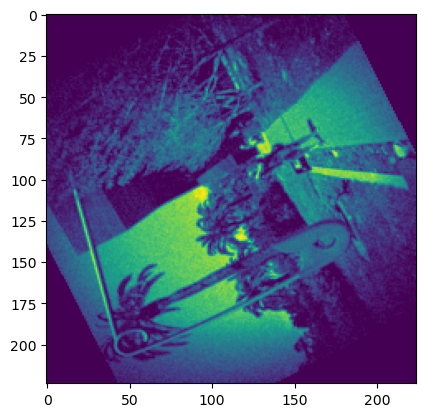

In [26]:
plt.imshow(trans_img.sum(0))
expl, pred = expl_func(trans_img.unsqueeze(0).cuda(), y)

In [21]:
expl = center_crop_224(F.interpolate(expl, (322, 322), mode='bicubic'))
print(pred)

tensor(772, device='cuda:0')


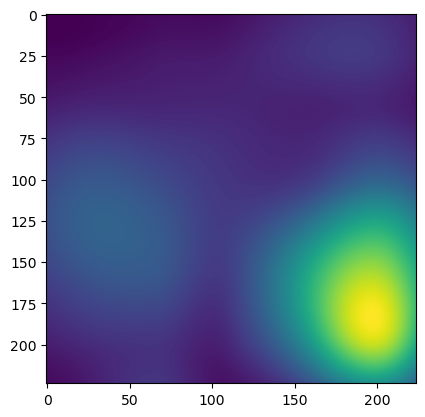

In [10]:
plt.imshow(expl.squeeze().detach().cpu())

In [12]:
T_inv_spatial = transforms.Compose([
    transforms.RandomRotation((-117.0, -117.0), InterpolationMode.BILINEAR),
    transforms.RandomHorizontalFlip(1),
    
])

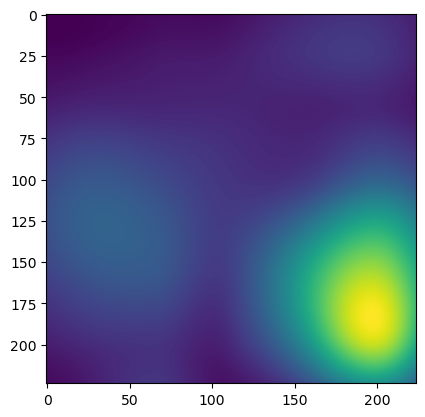

In [27]:
# expl = center_crop_224(T_inv_spatial(F.interpolate(expl, (322, 322), mode='bicubic')))
_expl = center_crop_224(F.interpolate(expl, (322, 322), mode='bicubic'))




plt.imshow(_expl.squeeze().detach().cpu())